
<table width="100%">
<td style="font-size:45px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Ejercicios y Soluciones
</td></table>



$ \renewcommand{\bra}[1]{\langle #1|} $
$ \renewcommand{\ket}[1]{|#1\rangle} $
$ \renewcommand{\braket}[2]{\langle #1 | #2\rangle} $
$ \renewcommand{\ketbra}[2]{\ket{ #1} \bra{#2}} $
$ \renewcommand{\i}{{\color{blue} i}} $ 
$ \renewcommand{\Hil}{{\mathcal H}} $
$ \renewcommand{\cg}[1]{{\rm C}#1} $
$ \renewcommand{\tr}{{\rm Tr}\,} $
$ \renewcommand{\boldsig}{\boldsymbol{\sigma}} $
$ \renewcommand{\Lin}{\hbox{Lin}} $

In [22]:
import numpy as np
import scipy.linalg as la
' qiskit tiene un visualizador '
from qiskit.tools.visualization import array_to_latex
from IPython.display import display, Latex

import macro_tQ as tQ

<table width="100%">
<td style="font-size:30px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
1.2 Vectores
</td></table>

<a id="Ex_1.2.1"></a>
<div class="alert alert-block alert-success">
<b>Ejercicio 1.2.1</b>
<br>

- escribe una función $braket(u,v)$ que calcule y devuelva la el producto escalar $\braket{u}{v}$, y, con ella, una función $norm(u)$ que calcule la norma $\| \ket{u}\|$.
Verifica que $\| \ket{u}\| = \sqrt{\braket{u}{u}}$ coincide con el resultado que da la función $np.linalg.norm$.

- escribe una función $random\_ket$ que genere un vector normalizado  $\ket{v}\in\Hil$ de dimensión $d$.
        
</div>


</div>

In [2]:
def braket(u,v):
        assert len(u) == len(v)
        vket = v   
        ubra = u.conj().T
        return np.round(np.dot(ubra,vket),10)     
    
def braket2(u,v):
    assert len(u)==len(v)
    u = np.array(u).flatten()
    v = np.array(v).flatten()
    return np.sum([u[i].conjugate()*v[i] for i in range(len(u))])


def norm(u):
        return np.sqrt(braket(u,u).real)    
    
def normalized(u):
        return u/norm(u)   
    
def random_ket(d, seed = None):
    np.random.seed(seed)
    ket = np.array([complex(np.random.uniform(-1, 1), np.random.uniform(-1, 1)) for _ in range(d)])
    ket /= norm(ket)
    return ket.reshape(d,1)

<table width="100%">
<td style="font-size:30px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
1.3 Operadores
</td></table>

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>
<br>
escribe una función, $ket\_bra$, que calcule y devuelva la el producto externo $\ketbra{u}{v}$  de dos vectores  $\ket{u},\ket{v} \in \Hil$.
</div>

In [5]:
def ket_bra(u,v):
    uket = u
    vbra = v.conj()
    return np.outer(uket,vbra)

In [6]:
def ket_bra(u,v):
    assert len(u) == len(v)
    d = len(u)
    vbra = v.conj()
    ket_bra = np.zeros([d,d],dtype=complex)
    for i in range(d):
        for j in range(d):
            ket_bra[i,j] = u[i]*v[j].conjugate()
   
    return ket_bra

comprobamos

In [7]:
array_to_latex(ket_bra(random_ket(2),random_ket(2)))

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
<br>    
comprueba la consistencia de las expresiones $~A = \sum_{i,j=1}^N A_{ij} \ketbra{i}{j} $ y $~A_{ij} = \bra{i} A \ket{j}$
</div>

\begin{eqnarray}
\bra{i} A \ket{j} &=&  \bra{i}\left(\sum_{k,l=1}^N A_{kl} \ketbra{k}{l}  \right) \ket{j}\nonumber\\
    &=&\sum_{k,l=1}^N \braket{i}{k} A_{kl} \braket{l}{j} \nonumber\\
    &=&\sum_{k,l=1}^N \delta_{ik} A_{kl} \delta_{lj} = A_{ij}
\end{eqnarray}


<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
<br>    
Escribe una función $basis\_change$ que reciba una matriz $C_{ij}$ de cambio de base $\ket{\tilde e_j} = \sum_i{C_{ij}}\ket{e_i}$, la columna  $O_i$ de componentes de un vector, ó la matriz $O_{ij}$ de componentes un operador, y devuelva las componentes transformadas $\tilde O_i~$ ó $~\tilde O_{ij}$ en la nueva base. 
    
</div>

In [8]:
def basis_change(C,O):
    
    assert O.shape[0]==C.shape[0]
    
    if O.shape[1] != 1:
        tO = C.conjugate().T@O@C
    
    elif O.shape[1] == 1:
        tO = C.conjugate().T@O
        
    return tO

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>
<br>    

Resta de  ${\rm dim}_{\bf R}({\rm L}(\Hil)) =  2N^2$ el número de ecuaciones que restringen la matriz de un operador 
unitario y halla así la  dimensión (real) de la <i>variedad de operadores unitarios</i>
</div>

En $\Hil$ un espacio complejo de dimensión <i>compleja</i> $N$, una matriz genérica $U\in \Lin(\Hil)$ tiene $2N^2$ parámetros reales.

La condición de unitariedad $U^\dagger U  = I $ es un conjunto de $N^2$ ecuaciones complejas. Sin embargo

- la ecuaciones fuera de la diagonal forman un conjunto invariante transposición, por tanto, sólo son $N(N-1)/2$ ecuaciones complejas, es decir $N^2 - N$ reals.  

- las ecuaciones de la diagonal son reales, por lo tanto sólo contribuyen con $N$ ecuaciones. 

En total, la condición de unitariedad supone $N^2$ condiciones para los $2N^2$ parámetros reales iniciales, lo cual deja libres $N^2$ parámetros. Ésta es la dimensión de la variedad $U(N)$ de matrices unitarias $N\times N$.


<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
<br>    
Demuestra que la combinación lineal de dos operadores <i>hermíticos</i>  es hermítica sólo si los coeficientes son reales. Demuestra que su composición no es hermítica en general.

Resta de  ${\rm dim}_{\bf R}({\rm L}(\Hil)) =  2N^2$ el número de ecuaciones que restringen la matriz de un operador 
hermítico y halla así la dimensión (real) de la  <i>subespacio vectorial de operadores hermíticos</i>. 
</div>

$$
 (a A+ b B)^\dagger = a^* A^\dagger+ b^* B^\dagger = a^* A + b^* B = aA + bB ~~~\Leftrightarrow ~~~~ a = a^*, b=b^* 
$$
    
$$
(AB)^\dagger = B^\dagger A^\dagger = B A  \neq AB
$$
    

en $\Hil$ un espacio complejo de dimensión <i>compleja</i> $N$, una matriz genérica $A\in \Lin(\Hil)$ tiene $2N^2$ parámetros reales.

La condición de hermiticidad $A^*_{ij} = A_{ji}$ tiene la siguiente solución 

- la parte real es una matriz simétrica $\hbox{Re}(A_{ij}) = \hbox{Re}(A_{ji})$, son $N(N+1)/2$ parámetros libres
<br>

- la parte imaginaria es una matriz antisimétrica  $\hbox{Im}(A_{ij}) = -\hbox{Im}(A_{ji})$, son $N(N-1)/2$ parámetros libres

En total $N(N+1)/2 + N(N-1)/2 = N^2$ parámetros libres, es la dimensión del subespacio hermítico.


<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
<br>
    
Escribe una función, $random\_hermitian$, que genere una matriz hermítica de dimensión $d$.
Comprueba en distintos casos que el espectro es real. 
 

In [9]:
def random_hermitian(d):   
    real_part = np.random.uniform(-1, 1, (d, d))
    imag_part = np.random.uniform(-1, 1, (d, d))
    complex_matrix = np.matrix(real_part + imag_part * 1j)
    hermitian_matrix = 0.5*(complex_matrix + complex_matrix.conj().T)
    return hermitian_matrix

Generemos una matriz hermítica y comprobemos que sus autovalores son reales

In [10]:
d=4 

hermit_mat = random_hermitian(d).getH()

np.round(la.eig(hermit_mat)[0],5)

array([ 2.2278 -0.j, -1.33681+0.j, -0.44292+0.j,  0.39432-0.j])

<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
<br>

Escribe una función, $random\_unitary$, que genere una matriz unitaria aleatoria de dimensión $d$.
Comprueba en distintos casos que el espectro está formado por fases
</div> 

<div class="alert alert-block alert-success">
    <b> Ejercicio: </b>  (<i> Reflector</i>)
<br>

Dado un vector unitario $\ket{u}$, escribe 
<br>    
<br>    
- el operador $R_{u}^{\perp}$ que refleja la componente perpendicular a $\ket{u}$ de cualquier  vector $\ket{\psi}$   
<br>
<br>
- el operador $R_{u}^{\|}$ que refleja la componente paralela a $\ket{u}$ de cualquier  vector $\ket{\psi}$  
<br>  
    
</div>

<div class="alert alert-block alert-success">
<b> Ejercicio: </b> <br> 

Escribe una función, $spectral\_decomp$, que devuelva las dos listas $\lambda_i$ y $P_i$ asociadas a la decomposición espectral de un operador diagonalizable $A = \sum_i \lambda_i P_i$.   
    
Obtén la descomposición espectral de las tres matrices de Pauli, $\sigma_x, \sigma_y $ y $\sigma_z$.   
    
Utiliza esta descomposición para demostrar que
$$
e^{i \alpha\,  {\bf n}\cdot\boldsymbol{\sigma}} = \cos \alpha \, I + i \sin \alpha \, {\bf n}\cdot\boldsymbol{\sigma}
$$
</div>

In [11]:
def spectral_decomp(A):
    eigvals, eigvecs = np.linalg.eigh(A)
    return eigvals, [ket_bra(eigvecs[:,i],eigvecs[:,i]) for i in range(A.shape[0])]

In [12]:
A = random_hermitian(3)  
' Matrices de Pauli'
s0 = np.matrix([[1,0],[0,1]]) # matriz identidad
s1 = np.matrix([[0,1],[1,0]],dtype = complex)
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])

In [13]:
eigenvalues, proyectors = spectral_decomp(s1)
print(eigenvalues)
array_to_latex(proyectors[1])

[-1.  1.]


<IPython.core.display.Latex object>

In [14]:
sum(eigenvalues[i]*proyectors[i] for i in range(2))

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$

Genera tres matrices aleatorias $A,B$ y $C$ y comprueba la igualdad
<br>
<br>
$$
{\rm tr}(ABC)= {\rm tr}(BCA) = {\rm tr}(CAB)
$$
Demuestra dicha igualdad matemáticamente
    
</div>

In [15]:
A =np.random.rand(2,2)
B =np.random.rand(2,2)
C =np.random.rand(2,2)                  

print('tr(ABC)=', np.trace(A@B@C))
print('tr(BCA)=', np.trace(B@C@A))
print('tr(CAB)=', np.trace(C@A@B))

tr(ABC)= 1.335203363636943
tr(BCA)= 1.3352033636369431
tr(CAB)= 1.3352033636369431


\begin{eqnarray}
{\rm tr}(ABC)&=& \sum_{i,j,k}A_{ij}B_{jk}C_{ki} =\sum_{j,k,i}B_{jk}C_{ki}A_{ij}={\rm tr}(BCA) \end{eqnarray}


<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
escribe una función $trace\_norm(A)$ que calcule la norma de la traza de un operador. 
</div>

<table width="100%">
<td style="font-size:30px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Tensores
</td></table>

<div class="alert alert-block alert-success">
    <b>Ejercicio:</b> 
    
escribe una función  <i>kronecker(u,v)</i> que tome dos kets (como vectores columna)  y devuelva su producto de Kronecker. Verifica el resultado con la funcion $kron$ de numpy.  
</div>

In [16]:
def kronecker(u,v):
    u = np.array(u).flatten()
    v = np.array(v).flatten()
    return [u[i]*v[j] for j in range(len(v)) for i in range(len(u))]   

In [17]:
import numpy as np

u = [0,1]
v = [0,1]
w = [0,1]

kronecker(u,v)

[0, 0, 0, 1]

<table width="100%">
<td style="font-size:30px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Un cúbit
</td></table>

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
En la figura observamos el resultado de hacer pasar una nube de electrones a través de tres detectores de Stern Gerlach perpendiculares.
<br>
<br>
    
<img src="images/Stern-Gerlach_Analyzer.png" width="60%" style="margin:auto"/>
    
 Reproduce ese experimento en un circuito. Toma el eje $Y$ como eje de propagación orienta los detectores sucesivamente a lo largo de $Z$, y $X$ y $Z$ de nuevo. 
    
Ejecuta el circuito lanzando los electrones de 1 en 1 en un estado inicial arbitrario y observa los resultados intermedios. 
    
Lanza ahora una nube de electrones y observa la estadística    
</div>

In [18]:
from qiskit import Aer, execute, QuantumCircuit

qc = QuantumCircuit(1,3)

#qc.h(0)
qc.measure(0,2)
qc.h(0)
qc.measure(0,1)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

nshots = 1

M_simulator = Aer.get_backend('qasm_simulator')

execute(qc,M_simulator,shots = nshots).result().get_counts()


{'010': 1}

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 

 genera un estado arbitrario, $\ket{\psi}$, y calcula el valor esperado $\langle X\rangle_\psi = \bra{\psi}X\ket{\psi}$
</div>

<X> = -0.34856


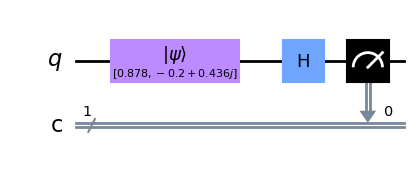

In [19]:
from qiskit import Aer, execute, QuantumCircuit 

# definimos un estado arbitrario en la esfera de Bloch
theta = 1.  #rad
phi   = 2.  #rad
psi_state = [np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]

qc = QuantumCircuit(1,1)
qc.initialize(psi_state,0)
#qc.u(theta,phi,0,0)
qc.h(0)
qc.measure(0,0)

shots = 100000
counts=execute(qc,backend=Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

mean_X = 0
for bits, counts  in counts.items():
    mean_X += (-1)**(int(bits)) * counts/shots  

print('<X> =',np.round(mean_X,5))

qc.draw('mpl')

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 

 calcula el valor esperado $\langle Y\rangle_\psi = \bra{\psi}Y\ket{\psi}$
</div>

<Y> = 0.76562


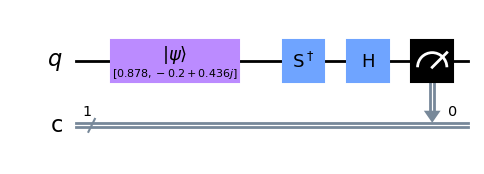

In [20]:
# definimos un estado arbitrario en la esfera de Bloch
theta = 1.  #rad
phi   = 2.  #rad
psi_state = [np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]

qc = QuantumCircuit(1,1)
qc.initialize(psi_state,0)
#qc.u(theta,phi,0,0)
qc.sdg(0)
qc.h(0)
qc.measure(0,0)

shots = 100000
counts=execute(qc,backend=Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

mean_Y = 0
for bits, counts  in counts.items():
    mean_Y += (-1)**(int(bits)) * counts/shots  

print('<Y> =',np.round(mean_Y,5))

qc.draw('mpl')

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
Calcula por este procedimiento los valores de  $\langle X\rangle_\psi$, $\langle Y\rangle_\psi$ y $\langle Z\rangle_\psi$ encontrados anteriormente y verifica que obtienes el mismo resultado. 
</div>

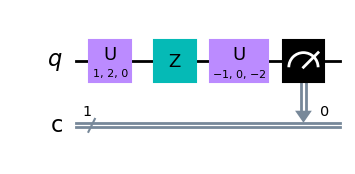

AttributeError: module 'macro_tQ' has no attribute 'get_probs'

In [21]:
from qiskit.circuit.library.standard_gates import U3Gate
M_simulator = Aer.get_backend('qasm_simulator')

'definimos un estado arbitrario en la esfera de Bloch'
theta = 1.  #rad
phi   = 2.  #rad

' el operador unitario que lo genera a partir de |0> es u(theta, phi, 0,0)'
qc_Upsi = QuantumCircuit(1,1)
qc_Upsi.u(theta,phi,0,0)
qc_Upsi.z(0)
#qc_Upsi.x(0)
#qc_Upsi.y(0)
qc_Upsi.u(-theta,0,-phi,0)

qc_Upsi.measure(0,0)

display(qc_Upsi.draw('mpl'))

' ejecutamos '
shots= 100000
counts=execute(qc_Upsi,backend=M_simulator,shots=shots).result().get_counts()
probs = tQ.get_probs(counts)

' ahora solo nos interesa el número de 0 '
mean_A = np.sqrt(counts['0']/shots)
print('<A> =',np.round(mean_A,5))


<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 

genera un observable arbitrario $A \in \hbox{Lin}({\cal H})$ y calcula el valor esperado $\bra{\psi}A\ket{\psi}$
</div>

In [ ]:
' Matriz genérica '
A = np.matrix(np.random.rand(2,2) + 1j*np.random.rand(2,2))
A += A.getH()

In [ ]:
' Matrices de Pauli'
s0 = np.matrix([[1,0],[0,1]]) # matriz identidad
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])

ss = [s0,s1,s2,s3]

aa = [np.trace(np.dot(A,ss[i])) for i in range(4)] 

In [ ]:

import copy
M_simulator = Aer.get_backend('qasm_simulator')

'estado genérico'
# definimos un estado arbitrario en la esfera de Bloch
theta = 1.  #rad
phi   = 2.  #rad

shots = 100000

qc = QuantumCircuit(1,1)
qc.u(theta,phi,0,0)

' medimos <X> '
mean_X = 0
qcx = copy.deepcopy(qc)
qcx.h(0)
qcx.measure(0,0)
counts_x=execute(qcx,backend= M_simulator,shots=shots).result().get_counts()
for bits, counts  in counts_x.items():
    mean_X += (-1)**(int(bits)) * counts/shots  

' medimos <Y> '
mean_Y = 0
qcy = copy.deepcopy(qc)
qcy.sdg(0)
qcy.h(0)
qcy.measure(0,0)
counts_y=execute(qcy,backend=M_simulator,shots=shots).result().get_counts()
for bits, counts  in counts_y.items():
    mean_Y += (-1)**(int(bits)) * counts/shots    
 
' medimos <Z> '
mean_Z = 0
qcz = copy.deepcopy(qc)
qcz.measure(0,0)
counts_z=execute(qcz,backend=M_simulator,shots=shots).result().get_counts()
for bits, counts  in counts_y.items():
    mean_Z += (-1)**(int(bits)) * counts/shots  

' componemos <A> '    
    
mean_A = aa[0] + aa[1]*mean_X + aa[2]*mean_Y + aa[3]*mean_Z

print('<psi|A|psi>' = 5)

<table width="100%">
<td style="font-size:30px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Estados multi-cúbit
</td></table>

<div class='alert alert-block alert-success'>
    <b>Ejercicio </b> 
<br>

escribe una función $exp\_val\_pauli(P,u)$ que reciba como dato, un estado $\ket{u}\in \Hil^{\otimes n}$ y una cadena $P = 'IXYZZ..'$ que represente un operador de Pauli múltiple  y   devuelva el valor esperado $\bra{u}P\ket{u}$.
    
</div>

In [ ]:
def add_multi_measure_IXYZ(qc,pauli_string):

    assert(qc.num_qubits==len(pauli_string))

    for i,basis in enumerate(pauli_string):
        if  basis == 'X':
            qc.h(i)    
            qc.measure(i, i)
        elif basis == 'Z' or basis =='I':
            qc.measure(i, i)
            pass    
        elif basis == 'Y':
            qc.sdg(i)
            qc.h(i)
            qc.measure(i, i)

    return qc 

In [ ]:
def exp_val_pauli(pauli_string,u):
    
    u = u.reshape(u.shape[0])# this is what statevector wants, a row array
    N = len(u)
    n = int(np.log2(N))
    assert(n == len(pauli_string))

    '''creamos un circuito e inicializamos el estado'''
    from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, execute
    qr = QuantumRegister(n,name='q')
    cr = ClassicalRegister(n,name='c')
    qc = QuantumCircuit(qr,cr)
  
    qc.initialize(u,qr)

    '''añadimos las medidas en las bases rotadas'''
    add_multi_measure_IXYZ(qc,pauli_string)
    #print(qc.draw())
    '''ejecutamos el circuito '''
    shots = 4000
    counts=execute(qc,backend=Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts() # Hacemos la simulación 4096 veces )
    '''calculamos el valor esperado'''
    #print(counts)
    expval=0
    for bitstring, count  in counts.items():
        phase = 0
        for i in range(len(bitstring)):
            if pauli_string[i]!= 'I':   # esto hay que hacerlo para no contabilizar qubits con la identidad
                phase+=int(bitstring[i]) 
                
        expval += (-1)**phase * count/shots 
    
    return expval   

In [ ]:
from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, execute

u = random_ket(8,seed = 3)
u = np.array([1,0,0,0,0,0,0,0])

exp_val_pauli('III',u)

<div class="alert alert-block alert-success">
<b>Exercies 3.5:</b> 
 (challenge!)

Extend the  function  $exp\_val(A,u)$ to return the expectation value $\bra{u}A\ket{u}$ of an observable in the multicubit state  $\ket{u}\in\Hil^{\otimes n}$.

Apply this function to the   Heisenberg hamiltonian in $\Hil^{\otimes 2}$, taking $J=1eV$ and obtain the value of the energy $E = \langle H\rangle_\Psi$  in the four Bell states  $\ket{\psi} = \ket{B_{ij}}$.  

<i>Tip</i>: you can ask for help if you lack coding skills, but you should document all the steps in the code. 
</div>

<div class="alert alert-block alert-success">
 <b>Ejercicio </b>  
    
escribe una función $exp\_val(A,u)$  que reciba como argumento un estado $\ket{u}$ y un observable $A$, definidos  sobre $\Hil^{\otimes n}$ y devuelva el valor esperado $\bra{u}A\ket{u}$.
<div>


Primero calculamos todas las posibles cadenas de Pauli

In [ ]:
def exp_val(A,u):
    
    ' Matrices de Pauli'
    s0 = np.matrix([[1,0],[0,1]]) # matriz identidad
    s1 = np.matrix([[0,1],[1,0]])
    s2 = np.matrix([[0,-1j],[1j,0]])
    s3 = np.matrix([[1,0],[0,-1]])
    ss = [s0,s1,s2,s3]

    from itertools import product
    idx = [0, 1, 2, 3]

    '''compute the projections'''
    idx2srt_0123 = {0: '0', 1: '1', 2: '2', 3: '3'} 
    idxs_variations = product(idx, repeat=n)
    idxs_list = [''.join([idx2srt_0123[idx] for idx in idxs]) for idxs in idxs_variations]
    #print(idxs_list)
    
    paulistr_mat_list = []
    for i in range(len(idxs_list)):
        paulistr_mat = ss[int(idxs_list[i][0])]
        for j in range(n-1):
            paulistr_mat = np.kron(ss[int(idxs_list[i][j+1])],paulistr_mat)
        paulistr_mat_list.append(paulistr_mat)
        
    a_list = [np.trace(np.dot(paulistr_mat_list[i],A))/N for i in range(len(paulistr_mat_list))]
    #print(a_list)
    
    '''compute the expectation values in each Pauli string and add up'''   
    idx2str_IXYZ = {0: 'I', 1: 'X', 2: 'Y', 3: 'Z'} 
    idxs_variations = product(idx, repeat=n)
    idxs_IXYZ_list = [''.join([idx2str_IXYZ[idx] for idx in idxs]) for idxs in idxs_variations]
    #print(idxs_IXYZ_list)

    from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, execute
    exp_val_A = 0 
    for i in range(len(paulistr_mat_list)):
        exp_val_A += a_list[i] * exp_val_pauli(idxs_IXYZ_list[i],u)

    return np.round(exp_val_A, 6)
    


In [ ]:
n = 2
N = int(2**n)

A = random_hermitian(N)
#A = np.kron(s3,np.kron(s3,s3))

#u = random_ket(N)
u = np.array([1. + 0*1j,0,0,0])

exp_val(A,u)

Veamos los 4 estados de Bell, en el modelo de Heisenberg

In [ ]:
n=2
N = int(2**n)

B00 = normalized(np.array([1.,0.,0.,1]))
B01 = normalized(np.array([1,0,0,-1]))
B10 = normalized(np.array([0,1,1,0]))
B11 = normalized(np.array([0,1,-1,0]))

J = 1
H =  (J/4)*(np.kron(s1,s1) + np.kron(s2,s2) + np.kron(s3,s3) - np.kron(s0,s0))
array_to_latex(H)

In [ ]:
exp_val(H,B11)

<div class="alert alert-block alert-success">
<b>Ejercicio </b> 
    
Usar bases perpendiculares de  Alice $A\perp A'$,  y Bob $B\perp B'$, y formando un ángulo $\varphi$ entre sí. 
    
Sin pérdida de generalidad puedes tomar $B = X\perp Z = B'$. 
    
Variar $\varphi$ en el intervalo $(0,\pi)$ y hallar el valor de la máxima violación de la desigualdad de Bell.
¿Es mayor que en el ejemplo de clase? ¿Podrías  hallar otra violación aún mayor?

    
</div>

In [ ]:
'angulos de medida'
rangephi=[0,2*np.pi] #Intervalo'
ang_div=128       #divisiones'
valphi=np.linspace(rangephi[0],rangephi[1],ang_div) #lista de angulos'

'lista de correlaciones a calcular'
C=[0,0,0,0]

'lista de valores de R'
R=np.zeros(ang_div)

'Numero de medidas'
Nshots = 2048

from qiskit import QuantumCircuit, Aer
M_backend = Aer.get_backend('qasm_simulator')

for j in range(ang_div):
   
    'ángulos de medida'
    phi=valphi[j] 
    angmed=[[phi,np.pi/2],[phi+np.pi/2,np.pi/2],[phi,0],[phi+np.pi/2,0]] # AB , A'B , AB', A'B'

    for i in range(4):
        
        'una pareja de ángulos uno para A y otro para B '
        angs_AB=angmed[i]

        'hay un circuito para cada proceso de medida'
        qc=QuantumCircuit(2,2)

        'creamos el par de Bell B(11)'
        qc.x(0)
        qc.x(1)
        qc.h(0)
        qc.cx(0,1)
        
        'simulamos la medida en la base de los polarizadores de A y B rotados en torno al eje x'
        qc.rx(-angs_AB[0],0)
        qc.rx(-angs_AB[1],1)
        qc.measure([0,1],[0,1])
        
        #print(qc.draw())
        ' medimos '
        job=M_backend.run(qc,shots=Nshots)
        cuentas=job.result().get_counts()
          
        'construimos el correlador'
        C[i]= tq_expval_Zn_from_counts(cuentas)[0] # esta función está definida en macro_CURSO.py
  
    'construimos la cantidad R'
    R[j]=C[0]+C[1]+C[2]-C[3]


In [ ]:
3*np.pi/2

In [2]:
import numpy as np
' función analítica '
fx= 1 + 2*np.cos(valphi) - np.cos(2*valphi)
plt.plot(valphi,-fx,'k-',linewidth=1)
' resultado de la simulación'
plt.plot(valphi,R,'.')
plt.axhline(y = 2, color = 'r', linestyle = '-')
plt.axhline(y = -2, color = 'r', linestyle = '-')
plt.axhline(y = 2*np.sqrt(2), color = 'm', linestyle = '-')
plt.axhline(y = -2*np.sqrt(2), color = 'm', linestyle = '-')
' líneas horizotales en +2 y - 2'
plt.axvline(x = np.pi/3, color = 'b', linestyle = '-')
plt.axvline(x = 5*np.pi/3, color = 'b', linestyle = '-')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$R(\varphi)$')
plt.show()

NameError: name 'valphi' is not defined

<div class="alert alert-block alert-success">
<b>Exercise 3.2:</b> 
    
By evolving the initial state show that the following circuit indeed creates a $\ket{B_{00}}_{AC}$ Bell state between $A$ and $C$.  Complete the circuit to teleport a state $\ket{\psi}$ from $A$ to  $C$. 
<br>
<br>
    
<div>
<img src="images/ent_swap.png" width="30%" style="margin:auto"/>
</div>


<table width="100%">
<td style="font-size:30px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Mezcla de Estados
</td></table>

<div class="alert alert-block alert-success">
<b> Ejercicio </b>:   
<br>    
    Escribe una función $get\_density\_operator$ en python que tome por argumentos una lista $\{p_a\}, \, a=1,..,r$ de probabilidades, y otra lista $\{\ket{\psi_a}\}$ de vectores normalizados en un espacio $\Hil$ de dimensión $d$, y devuelva el operador densidad $\rho$.
    
Ejecútala con argumentos generados aleatoriamente.
</div>

In [23]:

def density_operator(probs,vector_list):

    r = len(probs)
    d = len(vector_list[0])
    rho = np.zeros([d, d], dtype=complex)

    for i in range(r):
        rho += probs[i]*np.outer(np.conjugate(vector_list[i]),vector_list[i])
        
    return rho

def random_probs(r):
    probs=np.random.rand(r)
    probs /= np.sum(probs)
    return probs


def random_factor_vector(dA,dB):
    vectorA= np.array([complex(np.random.uniform(-1, 1), np.random.uniform(-1, 1)) for _ in range(dA)])
    vectorA/=la.norm(vectorA)
    vectorB= np.array([complex(np.random.uniform(-1, 1), np.random.uniform(-1, 1)) for _ in range(dB)])
    vectorB/=la.norm(vectorB)
    vector = np.kron(vectorA,vectorB)  
    return vector



<div class="alert alert-block alert-success">
<b> Ejercicio </b>:     
Usando la función $get\_density\_operator$, genera de forma aleatoria operadores densidad para distintos valores de $r$ y $d$. Obtén los valores de $\tr \rho$ y $\tr \rho^2$ 

</div>

In [ ]:
r = 4
d = 4

#probs = get_random_probs(r)
probs = [1.,1,1.001,1.001]

#normalizamos las probabilidades
probs /= np.sum(probs)

vectors = [random_ket(d) for _ in range(r)]
vectors = [1/np.sqrt(2.)*np.array([1,0,0,1]),1/np.sqrt(2.)*np.array([0,1,-1,0]),1/np.sqrt(2.)*np.array([0,1,+1,0]),1/np.sqrt(2.)*np.array([1,0,0,-1])]

rho = density_operator(probs,vectors)

array_to_latex(rho)

print('Tr(rho)=',np.round(np.trace(rho),4) , ' ;   Tr(rho^2)=',np.round(np.trace(rho**2),4) )

<div class="alert alert-block alert-success">
<b> Ejercicio </b>:    genera  operadores densidad con $d=2$ usando la función $get\_density\_operator$ y obtén, en cada caso, el valor del vector  ${\bf u}$ y su módulo $u$. Observa la variación con $r$. 
    
Para $r=d=2$ genera un estado $\rho$ máximamente mezclado y verifica que ${\bf u} = 0$.
</div>

In [ ]:
# Matrices de Pauli
sx= np.matrix([[0,1],[1,0]])
sy= np.matrix([[0,-1j],[1j,0]])
sz= np.matrix([[1,0],[0,-1]])


####################
r = 4
d = 2
#####################

probs = random_probs(r)

vectors = [random_ket(d) for _ in range(r)]

rho = density_operator(probs,vectors)

uvec = [np.trace(np.dot(sx,rho).real),np.trace(np.dot(sy,rho).real),np.trace(np.dot(sz,rho).real)]
print( 'u = ',uvec)
print( '|u| = ',la.norm(uvec))

In [ ]:
####################
r = 2
d = 2
#####################

probs = np.array([1/2,1/2])
vectors = [1/np.sqrt(2.)*np.array([1,1]),1/np.sqrt(2.)*np.array([1,-1])]

rho = density_operator(probs,vectors)


uvec = [np.trace(np.dot(sx,rho).real),np.trace(np.dot(sy,rho).real),np.trace(np.dot(sz,rho).real)]
print( 'u = ',uvec)
print( '|u| = ',la.norm(uvec))

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
    define una función $get\_partial\_traces$ de Python que recibe como argumentos, una matriz $\rho$ de dimensión $d = d_A d_B$ y los datos $d_A$ y $d_B$ como dimensiones de $\Hil_A$ y $\Hil_B$. La función devuelve las dos matrices densidad  $\rho_A$ y $\rho_B$ obtenidas mediante las trazas parciales. 
    
Examina los casos en que $\rho$ es pura o mezclada, así como el caso en que $\rho= \ket{\psi}\bra{\psi}$ con $\ket{\psi}$  factorizable.
</div>

In [26]:
def partial_traces(rho,dA,dB):
    
    rhoA = np.zeros((dA,dA),dtype=complex)
    rhoB = np.zeros((dB,dB),dtype=complex)
    
    for i in range(dA):
        for j in range(dA):
            rhoA[i,j] = np.sum([rho.reshape(dA,dB,dA,dB)[i,a,j,a] for a in range(dB)])

    for a in range(dB):
        for b in range(dB):
            rhoB[a,b] = np.sum([rho.reshape(dA,dB,dA,dB)[i,a,i,b] for i in range(dA)])
            
    return rhoA, rhoB

In [28]:
def partial_traces_2(rho,dA,dB):
    
    rhoA = np.zeros((dA,dA),dtype=complex)
    rhoB = np.zeros((dB,dB),dtype=complex)
    
    for i in range(dA):
        for j in range(dA):
            rhoA[i,j] = np.sum([rho[dB*i+a,dB*j+a] for a in range(dB)])

    for a in range(dB):
        for b in range(dB):
            rhoB[a,b] = np.sum([rho[dB*i+a,dB*i+b] for i in range(dA)])
            
    return rhoA, rhoB

**Caso 1**: probemos con un estado puro $r=1$. En este caso esperamos que los operadores reducidos sean iguales.

In [29]:
r = 1
d = 4

probs = random_probs(r)
vectors = [random_ket(d) for _ in range(r)]


rho = density_operator(probs,vectors)

dA = 2
dB = 2
rhoA, rhoB = partial_traces(rho,dA,dB)
rhoA2, rhoB2 = partial_traces_2(rho,dA,dB)

display(array_to_latex(rhoA))
display(array_to_latex(rhoA2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
array_to_latex(rhoB)

podemos comprobar que no son puros, debido a que el estado  inicial era entrelazado

In [30]:
print(' pureza(rho_A) = ',np.round(np.trace(np.dot(rhoA,rhoA)),4).real)
print(' pureza(rho_B) = ',np.round(np.trace(np.dot(rhoB,rhoB)),4).real)

 pureza(rho_A) =  0.8413
 pureza(rho_B) =  0.8413


comprobamos que, efectivamente los operadores reducidos son los mismos.

In [31]:
eigvalA, eigvecA = la.eig(rhoA)
print('eigA = ',np.round(eigvalA,4))
eigvalB, eigvecB = la.eig(rhoB)
print('eigB = ',np.round(eigvalB,4))

eigA =  [0.0869+0.j 0.9131-0.j]
eigB =  [0.0869-0.j 0.9131+0.j]


**Caso 2**:  Ahora podemos hacer lo mismo con una mezcla, $r\geq 2$

In [32]:
r = 2
d = 4

probs = random_probs(r)
vectors = [random_ket(d) for _ in range(r)]


rho = density_operator(probs,vectors)

dA = 2
dB = 2
rhoA, rhoB = partial_traces(rho,dA,dB)

array_to_latex(rhoA)

<IPython.core.display.Latex object>

In [33]:
array_to_latex(rhoB)

<IPython.core.display.Latex object>

Ahora, de nuevo, los estados reducidos no son puros

In [34]:
print(' pureza(rho_A) = ', np.round(np.trace(np.dot(rhoA,rhoA)),4).real)
print(' pureza(rho_B) = ',np.round(np.trace(np.dot(rhoB,rhoB)),4).real)

 pureza(rho_A) =  0.6731
 pureza(rho_B) =  0.6819


además, en este caso, las matrices reducidas ya no son iguales

In [35]:
eigvalA, eigvecA = la.eig(rhoA)
print('eigA = ',np.round(eigvalA,4))
eigvalB, eigvecB = la.eig(rhoB)
print('eigB = ',np.round(eigvalB,4))

eigA =  [0.2058+0.j 0.7942-0.j]
eigB =  [0.1984+0.j 0.8016-0.j]


**Caso 3**: Estado puro $\rho = \ketbra{\Psi}{\Psi}$, con $\ket{\Psi}= \ket{\varphi}\ket{\phi}$ factorizable

In [36]:
dA = 3
dB = 4

probs = [1] # estado puro

vectors = [random_factor_vector(dA,dB)]

rho = density_operator(probs,vectors)
'verificamos que rho es un proyector'
np.round(np.trace(np.dot(rho,rho)),4)

(1+0j)

Tomamos trazas parciales y comprobamos que siguen siendo estados puros

In [37]:
rhoA, rhoB = partial_traces(rho,dA,dB)

print('pureza(rho_A)=', np.round(np.trace(np.dot(rhoA,rhoA)),4))

print('pureza(rho_B)=', np.round(np.trace(np.dot(rhoB,rhoB)),4))


pureza(rho_A)= (1-0j)
pureza(rho_B)= (1+0j)


de hecho siguen siendo operadores iguales $\rho_A = \rho_B$

In [38]:
eigvalA, eigvecA = la.eig(rhoA)
print('eigA = ',np.round(eigvalA,4))
eigvalB, eigvecB = la.eig(rhoB)
print('eigB = ',np.round(eigvalB,4))

eigA =  [-0.-0.j  1.-0.j -0.+0.j]
eigB =  [-0.-0.j  1.-0.j  0.+0.j -0.+0.j]


<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
considera el estado generado por el circuito $\ket{\psi} =  \hbox{CNOT}(1,0)\hbox{CNOT}(0,2)H(1) R_x(\alpha,0)\ket{000}$
con $\alpha = \pi/3$.
    
 Calcula las matrices densidad parciales $\rho_B =\tr_{01}( \ket{\psi}\bra{\psi})$ y $\rho_A =\tr_{2}( \ket{\psi}\bra{\psi})$. Verifica que corresponden a idénticos operadores y obtén su pureza. 
</div>

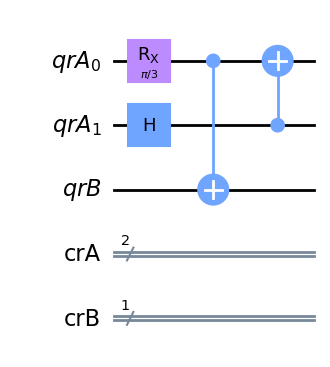

<IPython.core.display.Latex object>

In [2]:
import numpy as np
from qiskit import QuantumCircuit,Aer,execute, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import DensityMatrix, partial_trace, Statevector
M_simulator = Aer.get_backend('qasm_simulator')
S_simulator = Aer.get_backend('statevector_simulator')

qrA = QuantumRegister(2,name = 'qrA')
qrB = QuantumRegister(1,name = 'qrB')
crA = ClassicalRegister(2,name = 'crA')
crB = ClassicalRegister(1,name = 'crB')

qc = QuantumCircuit(qrA,qrB,crA,crB)

qc.rx(np.pi/3,0)
#qc.t(0)
qc.h(1)
qc.cx(0, 2)
qc.cx(1, 0)
#qc.cx(1,2)
#qc.h(2)

display(qc.draw('mpl'))

state_vector = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector(decimals=5)
Statevector(state_vector).draw('latex')

In [ ]:
rho = DensityMatrix(qc)
display(array_to_latex(rho,prefix = r'\rho = '))
print(rho.purity())

In [ ]:
rho_B = partial_trace(state=rho, qargs=[0, 1])
display(array_to_latex(rho_B,prefix = r'\rho_{B} = '))
print('pureza de rho_B =', rho2.purity())

Z = np.array([[1,0],[0,-1]])

In [ ]:
rho_A = partial_trace(state=rho, qargs=[2])
display(array_to_latex(rho_A,prefix = r'\rho_A = '))
print('pureza de rho_A=', rho_A.purity())

array_to_latex(la.eigh(rho_A)[0])

 <div class="alert alert-block alert-success">
<b>Exercise 3.4:</b> 
Code the circuit that prepares the state $\ket{\psi} =  \hbox{CNOT}(1,0)\hbox{CNOT}(0,2)H(1) R_x(\alpha,0)\ket{000}$
with $\alpha = \pi/3$. 
    
- Obtain  $\rho_B =\tr_{01}\rho $ y $\rho_A =\tr_{2}\rho$ donde $\rho = \ket{\psi}\bra{\psi}$.
<br>    
    
- experimentally compute $\langle  Z_2\rangle_\psi = \langle I\otimes I\otimes   Z\rangle_\psi $ and compare it with the prediction $\tr (Z\cdot\rho_B)$
<br>

- experimentally $\langle Z_0Z_1 \rangle_\psi $ and compare it with the perdiction $\tr (Z \otimes Z\cdot \rho_{A})$
<br>    

- Repeat for $\langle X_2\rangle_B$  y $\langle Z_0X_1\rangle_A$ 
    
</div>
</div>

In [ ]:
import copy
qcB = copy.deepcopy(qc)
qcB.barrier()
qcB.measure(qrB,crB)
qcB.draw('mpl')
shots = 1000000
countsB = execute(qcB,M_simulator,shots = shots).result().get_counts()
ev_Z_B = 0
print(countsB,'the measured bits are in position 0 in the bitstring')

for bitstring,  counts  in countsB.items():
    ev_Z_B += (-1)**(sum([int(bit) for bit in bitstring[0]]))*counts/shots  

    
print('<Z>_B experimental =',ev_Z_B)

print('<Z>_B theoretical =',np.trace(Z@rho_B.data))

In [ ]:
qcA = copy.deepcopy(qc)
qcA.barrier()
qcA.measure(qrA,crA)
display(qcA.draw('mpl'))
shots = 1000000
counts_A = execute(qcA,M_simulator,shots = shots).result().get_counts()
ev_Z_A = 0
print(counts_A,'the measured bits are in positions 2 and 3 in the bitstring') 

for bitstring,  counts  in counts_A.items():
    ev_Z_A += (-1)**(sum([int(bit) for bit in bitstring[2:4]]))*counts/shots  

print('<Z0Z1>_A experimental =',ev_Z_A)

print('<Z0Z1>_A theoretical =',np.trace(np.kron(Z,Z)@rho_A.data))

<div class="alert alert-block alert-success">
<b>Exercise 5.1:</b>  
Prove that:
    
$a)$  for any observable $A$,  the expectation value $\lambda_{min}\leq \bra{\psi} E \ket{\psi}  \leq \lambda_{max}$ where $\lambda_{min},\lambda_{max}$ are the smallest and largest eigenvalues of $E$, and $\ket{\psi}$ is any state.

$b)$  for any member  of a POVM, $\{ E_m\}\, ,  m=1,...,r $

-  the eigenvalues of $E_m $ are $\lambda_i \in [0,1]$.

- the following implications are valid for $\mu = 1, 0$
$$
\bra{\psi}E_m\ket{\psi} = \mu ~~~\Leftrightarrow ~~~E_m\ket{\psi} = \mu\ket{\psi}
$$

</div>

<div class="alert alert-block alert-success">
<b>Exercise 5.2:</b> 
Consider the following POVM 
$$
E_1 = \alpha(I-\ket{2}\bra{2})~~~,~~~E_2 = \alpha(I- \ket{1}\bra{1}) ~~~,~~~ E_3 = I-E_1 - E_2
$$
explicitely designed to distinguish one among the two of states $\{\ket{1},\ket{2}\}$ with   $\braket{1}{2}=c$. Show that the optimal value to maximize  the  probability of correct identification, $p$, when measuring on an  equiprobable ensemble of states is
$$
\alpha_{opt} = \frac{1}{1 + |c|} ~~~\Rightarrow ~~~p = 1-|c|
$$

</div>

<div class="alert alert-block alert-success">
<b>Exercise 5.3:</b> 
Suppose that Alice sends with equal  probability  $1/2$ the states   $ \ket{a_\perp} = \ket{1} ,  \ket{b_\perp} =  \frac{\sqrt{3}}{2}\ket{0} + \frac{1}{2}\ket{1}\}$. Write the density operator that Bob uses to describe the statistical mixture. 

Bob tries to identify correctly which state was actually sent first by using the projective measurement $Z = P_0 + P_1$.
Show that only $P_0$ discriminates and that this only occurs with probability 3/8 hence the identification rate is  $37.5\%$.

Then Bob tries to use the triangular POVM. Consider  directions $\{(\theta_a = 0,\phi_a = 0)$, $(\theta_b = 4\pi/3,\phi_b = 0)\}$ and $(\theta_c = 8\pi/3,\phi_c = 0)$.  Find the associated Bloch vectors 
$\{\ket{i} = \ket{\hat{\bf n}_i}\} , ~i=a,b,c$ and build the POVM $\{ E_i = \frac{2}{3}\ket{i}\bra{i}\}$.
Show that now Bob can discriminate $\ket{a_\perp}$ from $\ket{b_\perp}$ with up to $50\%$ certainty.
     
    
    
</div>

<div class="alert alert-block alert-success">
<b>Ejercicio 5.4:</b> 
<br> Trabaja numéricamente en $\Hil$ de dimensión $4$.
    
- de forma aleatoria, define un colectivo $\{\ket{\psi_a},q_a\},\, a = 0,...,3$. 
    
- obtén  $S(\rho)$   y calcula la entropía de formación. 

- haz una medida no-selectiva proyectiva en la base $\ket{i}$  computacional. Obtén la variación de entropía por la 
medida. 

- repite, haciendo la medida en la base $\ket{\lambda_i}$ de autoestados de $\rho$.   
    

</div>  

<div class="alert alert-block alert-success">
<b>Exercise 5.4:</b> 
Sean las dos matrices densidad $\rho_i = \frac{1}{2}(I + \frac{1}{2} \sigma_i)$   con $i = 2,3$.
Para la mezcla $\rho(\lambda) = \lambda \rho_2 + (1-\lambda)\rho_3$, calcula numéricamente  la información de Holevo y verifica la desigualdad que satisface. 
    
</div>